<a href="https://colab.research.google.com/github/shilpeemaitra/Lab/blob/main/2348557_ML_lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#loading the data
data=pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn - WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#checking for null values
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [5]:
#converting categorical data to numerical
from sklearn.preprocessing import LabelEncoder
for col in data.columns[~data.columns.isin(['MonthlyCharges','Tenure'])]:
  le=LabelEncoder()
  data[col]=le.fit_transform(data[col])

In [6]:
#defining the test variables
X = data.drop(columns=['Churn','customerID'], axis=1)
Y = data['Churn']

In [7]:
#splitting the data in 4:1 ratio for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

In [8]:
#applying logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [9]:
#finding the model training accuracy
from sklearn.metrics import accuracy_score
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.8008519701810437


In [10]:
#finding the prediction accuracy
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.8005677785663591


In [11]:
#Evaluating the model using precision,recall and f1-score
from sklearn.metrics import classification_report
print(classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.66      0.51      0.57       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [12]:
#Evaluating the model using Receiver Operating Characteristic ROC and Area Under the Curve AUC
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(Y_test, X_test_prediction)
roc_auc

0.7071507918055232

In [13]:
#Evaluating the model using Cohen's Kappa Score
from sklearn.metrics import cohen_kappa_score
cohen=cohen_kappa_score(Y_test,X_test_prediction)
cohen

0.4475458123858441

In [14]:
#Evaluating the model using Matthews Correlation Coefficient
from sklearn.metrics import matthews_corrcoef
matthew=matthews_corrcoef(Y_test, X_test_prediction)
matthew

0.4542398089307413

In [15]:
#creating confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, X_test_prediction)
confusion_matrix

array([[938,  97],
       [184, 190]])

<Axes: >

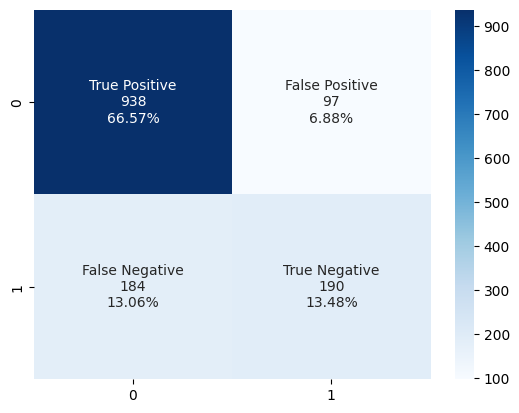

In [16]:
#visualizing confusion matrix
labels=group_names=['True Positive','False Positive','False Negative','True Negative']
group_counts = ["{0:0.0f}".format(value) for value in
                confusion_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
         zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Blues')

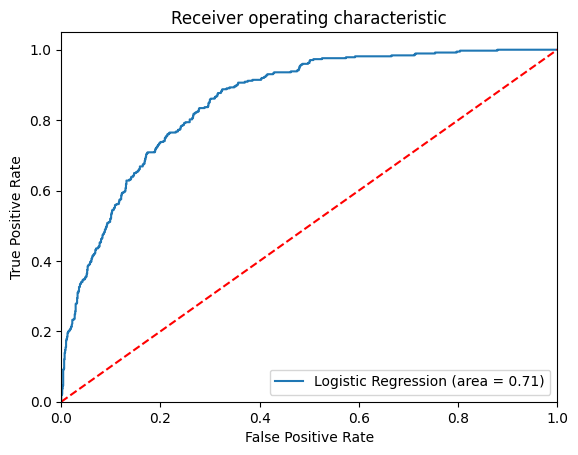

In [17]:
#Ploting the ROC curve and calculating the AUC.
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

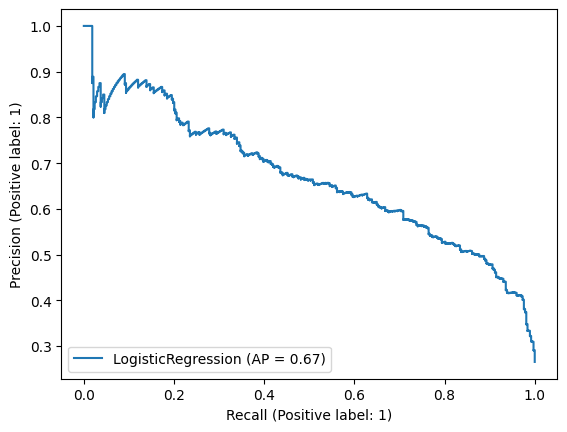

In [18]:
#Visualizing the precision-recall curve.
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(model, X_test, Y_test)
plt.show ()

In [19]:
from sklearn.metrics import log_loss as ll
logloss=ll(Y_test,X_test_prediction)
logloss

7.188265863975813